# Getting started with ekorpkit

![student](../figs/aiart/entelecheia_a_scholar.png)

## Introduction

ekorpkit is the acronym for eKonomic Research Python Toolkit. It looks like it's for economic research. Actually, it is a Python library for natural language processing and machine learning. In particular, it is designed to support the Korean language as well as English.

ekorpkit provides a flexible interface for NLP and ML research pipelines such as extraction, transformation, tokenization, training, and visualization. Its powerful configuration composition is backed by [Hydra](https://hydra.cc/).

It is highly recommended to get used to [Hydra](https://hydra.cc/) and [OmegaConf](https://omegaconf.readthedocs.io/en/2.2_branch/).

## Key features

### Easy Configuration

- You can compose your configuration dynamically, enabling you to easily get the perfect configuration for each research.
- You can override everything from the command line, which makes experimentation fast, and removes the need to maintain multiple similar configuration files.
- With a help of the **eKonf** class, it is also easy to compose configurations in a jupyter notebook environment.

### No Boilerplate

- eKorpkit lets you focus on the problem at hand instead of spending time on boilerplate code like command line flags, loading configuration files, logging etc.


### Workflows

- A workflow is a configurable automated process that will run one or more jobs.
- You can divide your research into several unit jobs (tasks), then combine those jobs into one workflow.
- You can have multiple workflows, each of which can perform a different set of tasks.

### Sharable and Reproducible

- With eKorpkit, you can easily share your datasets and models.
- Sharing configs along with datasets and models makes every research reproducible.
- You can share each unit jobs or an entire workflow.

### Pluggable Architecture

- eKorpkit has a pluggable architecture, enabling it to combine with your own implementation.


## Installation

To use ekorpkit, you need to install it first. The recommended way is to use pip.

Install the latest version of ekorpkit by running:

```bash
pip install -U ekorpkit
```

To install all extra dependencies,

```bash
pip install ekorpkit[all]
```

To install all extra dependencies, exhaustively, (not recommended)

```bash
pip install ekorpkit[exhaustive]
```

To install or upgrade the pre-release version of ekorpkit, run:

```bash
pip install -U --pre ekorpkit
```


## Extra dependencies

To list of extra dependency sets,


In [5]:
from ekorpkit import eKonf
eKonf.dependencies()


['tokenize',
 'all',
 'mecab',
 'dataset',
 'tokenize-en',
 'topic',
 'visualize',
 'parser',
 'wiki',
 'fomc',
 'edgar',
 'transformers',
 'model',
 'automl',
 'cached-path',
 'google',
 'ddbackend',
 'fetch',
 'doc',
 'disco',
 'art',
 'dalle-mini',
 'label',
 'exhaustive']

To seed the list of libraries in each dependency set,


In [6]:
eKonf.dependencies("tokenize")


{'emoji<2.0',
 'fugashi',
 'mecab-ko-dic',
 'mecab-python3',
 'nltk',
 'pynori',
 'pysbd',
 'sacremoses',
 'soynlp'}

## Usage

### Via Command Line Interface (CLI)

This CLI interface is useful when you already have a configuration file with a very little modification to parameter values.


In [7]:
!ekorpkit



name        : ekorpkit
author      : Young Joon Lee
description : eKorpkit provides a flexible interface for NLP and ML research pipelines such as extraction, transformation, tokenization, training, and visualization.
website     : https://entelecheia.github.io/ekorpkit-book/
version     : 0.1.38+23.g8fb9921.dirty

Execute `ekorpkit --help` to see what eKorpkit provides


#### CLI example to build a corpus


```bash
ekorpkit \
    verbose=false \
    print_config=false \
    num_workers=1 \
    cmd=fetch_builtin_corpus \
    +corpus/builtin=_dummy_fomc_minutes \
    corpus.builtin.io.force.summarize=true \
    corpus.builtin.io.force.preprocess=true \
    corpus.builtin.io.force.build=false \
    corpus.builtin.io.force.download=false
```    

#### CLI Help


```bash
ekorpkit --help
```

### Via Python

Your can use ekorpkit in more pythonic ways. eKonf class provides various helper functions. With eKonf class, you can compose an config and instantiate a class with that configuration.


In [10]:
from ekorpkit import eKonf
cfg = eKonf.compose()
print('Config type:', type(cfg))
eKonf.print(cfg)


Config type: <class 'omegaconf.dictconfig.DictConfig'>
{'_config_': 'about.app',
 '_target_': 'ekorpkit.cli.cmd',
 'about': {'app': {'_target_': 'ekorpkit.cli.about',
                   'author': 'Young Joon Lee',
                   'description': 'eKorpkit provides a flexible interface for '
                                  'NLP and ML research pipelines such as '
                                  'extraction, transformation, tokenization, '
                                  'training, and visualization.',
                   'name': 'ekorpkit',
                   'version': '0.1.38+23.g8fb9921.dirty',
                   'website': 'https://entelecheia.github.io/ekorpkit-book/'}},
 'app_name': 'ekorpkit',
 'corpus': {'_target_': 'ekorpkit.datasets.corpus.Corpus',
            'auto': {'load': True, 'merge': False},
            'column_info': {'_target_': 'ekorpkit.info.column.CorpusInfo',
                            'columns': {'id': 'id',
                                        'merge

## Examples


In [11]:
config_group = 'preprocessor/tokenizer=nltk'
cfg = eKonf.compose(config_group=config_group)
eKonf.print(cfg)
nltk = eKonf.instantiate(cfg)


{'_target_': 'ekorpkit.preprocessors.tokenizer.NLTKTokenizer',
 'extract': {'noun_postags': ['NN', 'NNP', 'NNS', 'NNPS'],
             'postag_delim': '/',
             'postag_length': None,
             'postags': None,
             'stop_postags': ['.'],
             'strip_pos': True},
 'nltk': {'lemmatize': False,
          'lemmatizer': {'_target_': 'nltk.stem.WordNetLemmatizer'},
          'stem': True,
          'stemmer': {'_target_': 'nltk.stem.PorterStemmer'}},
 'normalize': None,
 'return_as_list': False,
 'stopwords': {'_target_': 'ekorpkit.preprocessors.stopwords.Stopwords',
               'lowercase': True,
               'name': 'stopwords',
               'nltk_stopwords': None,
               'stopwords': None,
               'stopwords_path': None,
               'verbose': False},
 'stopwords_path': None,
 'tagset': None,
 'tokenize': {'flatten': True,
              'include_whitespace_token': True,
              'lowercase': False,
              'postag_delim': '/'

In [12]:
text = "I shall reemphasize some of those thoughts today in the context of legislative proposals that are now before the current Congress."
nltk.tokenize(text)


['i/PRP',
 'shall/MD',
 'reemphas/VB',
 'some/DT',
 'of/IN',
 'those/DT',
 'thought/NNS',
 'today/NN',
 'in/IN',
 'the/DT',
 'context/NN',
 'of/IN',
 'legisl/JJ',
 'propos/NNS',
 'that/WDT',
 'are/VBP',
 'now/RB',
 'befor/IN',
 'the/DT',
 'current/JJ',
 'congress/NNP',
 './.']

In [16]:
nltk.nouns(text)


['thought', 'today', 'context', 'propos', 'congress']

To use the mecab tokenizer,


In [13]:
cfg = eKonf.compose('preprocessor/tokenizer=mecab')
mecab = eKonf.instantiate(cfg)
text = 'IMF가 推定한 우리나라의 GDP갭률은 今年에도 소폭의 마이너스(−)를 持續하고 있다.'
mecab.tokenize(text)


['IMF/SL',
 '가/JKS',
 '/SP',
 '推定/NNG',
 '한/XSA+ETM',
 '/SP',
 '우리나라/NNG',
 '의/JKG',
 '/SP',
 'GDP/SL',
 '갭/NNG',
 '률/XSN',
 '은/JX',
 '/SP',
 '今年/NNG',
 '에/JKB',
 '도/JX',
 '/SP',
 '소폭/NNG',
 '의/JKG',
 '/SP',
 '마이너스/NNG',
 '(/SSO',
 '−)/SY',
 '를/JKO',
 '/SP',
 '持續/NNG',
 '하/XSV',
 '고/EC',
 '/SP',
 '있/VX',
 '다/EF',
 './SF']

To normalize a formal korean text,


In [20]:
cfg_norm = eKonf.compose('preprocessor/normalizer=formal_ko')
norm = eKonf.instantiate(cfg_norm)
norm(text)


'IMF가 추정한 우리나라의 GDP갭률은 금년에도 소폭의 마이너스(-)를 지속하고 있다.'

To instantiate a mecab config with the above normalizer config,

In [21]:
cfg = eKonf.compose("preprocessor/tokenizer=mecab")
cfg.normalize = cfg_norm
mecab = eKonf.instantiate(cfg)
mecab.tokenize(text)


['IMF/SL',
 '가/JKS',
 '/SP',
 '추정/NNG',
 '한/XSA+ETM',
 '/SP',
 '우리나라/NNG',
 '의/JKG',
 '/SP',
 'GDP/SL',
 '갭/NNG',
 '률/XSN',
 '은/JX',
 '/SP',
 '금년/NNG',
 '에/JKB',
 '도/JX',
 '/SP',
 '소폭/NNG',
 '의/JKG',
 '/SP',
 '마이너스/NNG',
 '(/SSO',
 '-)/SY',
 '를/JKO',
 '/SP',
 '지속/NNG',
 '하/XSV',
 '고/EC',
 '/SP',
 '있/VX',
 '다/EF',
 './SF']

## Text to image example

In [22]:
eKonf.setLogger("WARNING")
cfg = eKonf.compose("model/disco")
disco = eKonf.instantiate(cfg)

Setting up [LPIPS] perceptual loss: trunk [vgg], v[0.1], spatial [off]
Loading model from: /opt/conda/lib/python3.8/site-packages/lpips/weights/v0.1/vgg.pth


TimeToDisco(2) samples:   0%|          | 0/1 [00:00<?, ?it/s]

Output()

  0%|          | 0/240 [00:00<?, ?it/s]

1 samples generated to /workspace/projects/ekorpkit-book/disco-imagen/outputs/disco-diffusion/TimeToDisco
text prompts: steampunk vegetable market, cute, pixar, octane render, epic composition, wide angle
sample image paths:
/workspace/projects/ekorpkit-book/disco-imagen/outputs/disco-diffusion/TimeToDisco/TimeToDisco(2)_0000.png


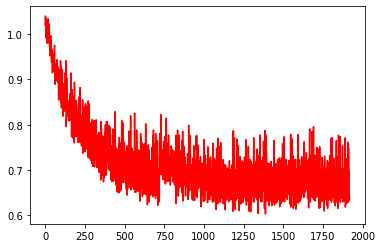

In [23]:
results = disco.imagine(
    text_prompts="steampunk vegetable market, cute, pixar, octane render, epic composition, wide angle", 
    n_samples=1, show_collage=False, width_height = [768, 512]
)